<a href="https://colab.research.google.com/github/harip/google-ml-course/blob/master/Index_of_Economic_Freedom_v2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Description
2019 Index of Economic Freedom – Problem Statement

## Background:
Created in 1995 by the Heritage Foundation, The Index of economic freedom, is a ranking created to
measure the economic freedom in the countries of the world. Now, in its 25 th edition, The Economic
Freedom Index is poised to help readers track over two decades of the advancement in economic
freedom, prosperity, and opportunity and promote these ideas in their homes, schools, and communities.
The Index covers 12 freedoms – from property rights to financial freedom – in 186 countries.
Source of the data:
This dataset belongs to The Heritage Foundation: https://www.heritage.org/index. This dataset is
freely available to download on their website.

 

# Data Set:
The data (last updated 26/02/2019) is presented in CSV format as follows:
CountryID, Country Name, WEBNAME, Region, World Rank, Region Rank, 2019 Score, Property
Rights, Judical Effectiveness, Government Integrity, Tax Burden, Gov&#39;t Spending, Fiscal Health,
Business Freedom, Labor Freedom, Monetary Freedom, Trade Freedom, Investment Freedom,
Financial Freedom, Tariff Rate (%), Income Tax Rate (%), Corporate Tax Rate (%), Tax Burden % of
GDP, Gov&#39;t Expenditure % of GDP , Country, Population (Millions), &quot;GDP (Billions, PPP)&quot;, GDP Growth
Rate (%), 5 Year GDP Growth Rate (%), GDP per Capita (PPP), Unemployment (%), Inflation (%), FDI
Inflow (Millions), Public Debt (% of GDP)
All these features are self-explanatory and the learners can research more on the same here.

Apply the concepts and techniques you have learned in the previous weeks to clusters countries based on variables that indicates freedom index and derive insights and make some business recommendations


# Deliverables:
1. Perform univariate analysis and explore the distribution of the features at hand. 
2. Perform bivariate analysis. Identify the correlation between features and take the required
actions.
3. Apply clustering algorithms like K-means and Hierarchical clustering to group together the economies that are similar in terms of the economic freedom
4. Reduce the dimensions at hand and select the minimum no of principal components that
can explain at least 95% of variance. Transform the data with the identified no of principal
components.
5. Perform clustering on reduced dimensions to group together the economies that are similar in terms of the
economic freedom. Select the optimum no. of clusters and explain the clusters that are
formed.
6. Summarize your findings and list the insights of your analysis 
Optional – Compare your cluster with the actual overall score and understand the validity of you
clusters. You can find the overall score here.

In [172]:
import pandas as pd
import numpy as np
from sklearn import metrics
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns

from scipy.spatial.distance import cdist
from sklearn.cluster import KMeans
import numpy as np 

from scipy.spatial.distance import pdist
from scipy.cluster.hierarchy import dendrogram, linkage,cophenet

In [173]:
# Base functions

# Function to display box chart and dist chart together
def box_dist_plot(colName, plotData):
    chartData = plotData[f'{colName}']
    f, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
    sns.boxplot(chartData,ax=ax1);
    sns.distplot(chartData,ax=ax2,kde=False);
    ax2.axvline(chartData.mean(), color='r', linestyle='--')

# Function to display box chart and dist chart together
def catg_percentage_plot(colName, plotData):
    sns.set(rc={'figure.figsize':(16,10)})
    df2=pd.DataFrame(plotData[f'{colName}'].value_counts(normalize=True).mul(100)).reset_index() 
    ax = sns.barplot(x='index',y=f'{colName}',data=df2)
    ax.set(xlabel=f'{colName}', ylabel='Percentage')
     
    for p in ax.patches:
        percentage = '{:.1f}%'.format(p.get_height()) # percentage of each class of the category
        x = p.get_x() + p.get_width() / 2 - 0.25 # width of the plot
        y = p.get_y() + p.get_height()           # hieght of the plot
        ax.annotate(percentage, (x, y), size = 14) # annotate the percantage 

    plt.show()   

def hist_plot(colName, plotData):     
    sns.histplot(plotData[plotData[f'{colName}'].notnull()],x=f'{colName}',hue='is_promoted',multiple="stack")
    plt.show()  

def heat_map(data):
    sns.set(rc={'figure.figsize':(16,10)})
    sns.heatmap(data,annot=True)
    plt.show()

def make_confusion_matrix(model,y_actual,labels=[1, 0]):
    '''
    model : classifier to predict values of X
    y_actual : ground truth  
    
    '''
    y_predict = model.predict(X_test)
    cm=metrics.confusion_matrix( y_actual, y_predict, labels=[0, 1])
    df_cm = pd.DataFrame(cm, index = [i for i in ["Actual - No","Actual - Yes"]],
                  columns = [i for i in ['Predicted - No','Predicted - Yes']])
    group_counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in
                         cm.flatten()/np.sum(cm)]
    labels = [f"{v1}\n{v2}" for v1, v2 in
              zip(group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    plt.figure(figsize = (10,7))
    sns.heatmap(df_cm, annot=labels,fmt='')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

def get_metrics_score(model,train,test,train_y,test_y,flag=True):
    '''
    model : classifier to predict values of X

    '''
    # defining an empty list to store train and test results
    score_list=[] 
    
    pred_train = model.predict(train)
    pred_test = model.predict(test)
    
    train_acc = model.score(train,train_y)
    test_acc = model.score(test,test_y)
    
    train_recall = metrics.recall_score(train_y,pred_train)
    test_recall = metrics.recall_score(test_y,pred_test)
    
    train_precision = metrics.precision_score(train_y,pred_train)
    test_precision = metrics.precision_score(test_y,pred_test)
    
    score_list.extend((train_acc,test_acc,train_recall,test_recall,train_precision,test_precision))
        
    # If the flag is set to True then only the following print statements will be dispayed. The default value is set to True.
    if flag == True: 
        print("Accuracy on training set : ",model.score(train,train_y))
        print("Accuracy on test set : ",model.score(test,test_y))
        print("Recall on training set : ",metrics.recall_score(train_y,pred_train))
        print("Recall on test set : ",metrics.recall_score(test_y,pred_test))
        print("Precision on training set : ",metrics.precision_score(train_y,pred_train))
        print("Precision on test set : ",metrics.precision_score(test_y,pred_test))
    
    return score_list # returning the list with train and test scores

In [174]:
df=pd.read_csv('economic_freedom_index2019_data.csv',encoding='latin1')
df.head(5)

,CountryID,Country Name,WEBNAME,Region,World Rank,Region Rank,2019 Score,Property Rights,Judical Effectiveness,Government Integrity,Tax Burden,Gov't Spending,Fiscal Health,Business Freedom,Labor Freedom,Monetary Freedom,Trade Freedom,Investment Freedom,Financial Freedom,Tariff Rate (%),Income Tax Rate (%),Corporate Tax Rate (%),Tax Burden % of GDP,Gov't Expenditure % of GDP,Country,Population (Millions),"GDP (Billions, PPP)",GDP Growth Rate (%),5 Year GDP Growth Rate (%),GDP per Capita (PPP),Unemployment (%),Inflation (%),FDI Inflow (Millions),Public Debt (% of GDP)
0,1,Afghanistan,Afghanistan,Asia-Pacific,152.0,39.0,51.5,19.6,29.6,25.2,91.7,80.3,99.3,49.2,60.4,76.7,66.0,10.0,10.0,7.0,20.0,20.0,5.0,25.6,Afghanistan,35.5,$69.6,2.5,2.9,"$1,958",8.8,5.0,53.9,7.3
1,2,Albania,Albania,Europe,52.0,27.0,66.5,54.8,30.6,40.4,86.3,73.9,80.6,69.3,52.7,81.5,87.8,70.0,70.0,1.1,23.0,15.0,24.9,29.5,Albania,2.9,$36.0,3.9,2.5,"$12,507",13.9,2.0,"1,119.1",71.2
2,3,Algeria,Algeria,Middle East and North Africa,171.0,14.0,46.2,31.6,36.2,28.9,76.4,48.7,18.7,61.6,49.9,74.9,67.4,30.0,30.0,8.8,35.0,23.0,24.5,41.4,Algeria,41.5,$632.9,2.0,3.1,"$15,237",10.0,5.6,"1,203.0",25.8
3,4,Angola,Angola,Sub-Saharan Africa,156.0,33.0,50.6,35.9,26.6,20.5,83.9,80.7,58.2,55.7,58.8,55.4,61.2,30.0,40.0,9.4,17.0,30.0,20.6,25.3,Angola,28.2,$190.3,0.7,2.9,"$6,753",8.2,31.7,"-2,254.5",65.3
4,5,Argentina,Argentina,Americas,148.0,26.0,52.2,47.8,44.5,33.5,69.3,49.5,33.0,56.4,46.9,60.2,70.0,55.0,60.0,7.5,35.0,30.0,30.8,41.0,Argentina,44.1,$920.2,2.9,0.7,"$20,876",8.7,25.7,"11,857.0",52.6


In [175]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 186 entries, 0 to 185
Data columns (total 34 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   CountryID                    186 non-null    int64  
 1   Country Name                 186 non-null    object 
 2   WEBNAME                      186 non-null    object 
 3   Region                       186 non-null    object 
 4   World Rank                   180 non-null    float64
 5   Region Rank                  180 non-null    float64
 6   2019 Score                   180 non-null    float64
 7   Property Rights              185 non-null    float64
 8   Judical Effectiveness        185 non-null    float64
 9   Government Integrity         185 non-null    float64
 10  Tax Burden                   180 non-null    float64
 11  Gov't Spending               183 non-null    float64
 12  Fiscal Health                183 non-null    float64
 13  Business Freedom    

In [176]:
# Check if data are unique - no duplicates 
print(df['CountryID'].is_unique)
print(df['Country Name'].is_unique)
print(df['WEBNAME'].is_unique) 
print(df['Country'].is_unique) 

True
True
True
True


In [177]:
df.columns

Index(['CountryID', 'Country Name', 'WEBNAME', 'Region', 'World Rank',
       'Region Rank', '2019 Score', 'Property Rights', 'Judical Effectiveness',
       'Government Integrity', 'Tax Burden', 'Gov't Spending', 'Fiscal Health',
       'Business Freedom', 'Labor Freedom', 'Monetary Freedom',
       'Trade Freedom', 'Investment Freedom ', 'Financial Freedom',
       'Tariff Rate (%)', 'Income Tax Rate (%)', 'Corporate Tax Rate (%)',
       'Tax Burden % of GDP', 'Gov't Expenditure % of GDP ', 'Country',
       'Population (Millions)', 'GDP (Billions, PPP)', 'GDP Growth Rate (%)',
       '5 Year GDP Growth Rate (%)', 'GDP per Capita (PPP)',
       'Unemployment (%)', 'Inflation (%)', 'FDI Inflow (Millions)',
       'Public Debt (% of GDP)'],
      dtype='object')

In [178]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
CountryID,186.0,93.500000,53.837719,1.0,47.250,93.50,139.750,186.0
World Rank,180.0,90.500000,52.105662,1.0,45.750,90.50,135.250,180.0
Region Rank,180.0,20.538889,12.738611,1.0,9.750,19.50,31.000,47.0
2019 Score,180.0,60.768333,11.255725,5.9,53.950,60.75,67.800,90.2
Property Rights,185.0,52.327568,19.608526,7.6,37.000,50.10,65.900,97.4
Judical Effectiveness,185.0,44.899459,18.104745,5.0,31.000,42.90,54.700,92.4
Government Integrity,185.0,41.470270,19.793193,7.9,27.200,35.50,50.300,96.7
Tax Burden,180.0,77.212778,13.208314,0.0,70.975,78.05,85.425,99.8
Gov't Spending,183.0,64.203825,23.150984,0.0,51.700,68.80,82.600,96.6
Fiscal Health,183.0,65.996721,31.764160,0.0,39.900,80.30,91.450,100.0


In [179]:
objData = ['Population (Millions)','GDP (Billions, PPP)','GDP per Capita (PPP)',
'Unemployment (%)','FDI Inflow (Millions)']

print('----------------------')
print('CATEGORY TYPES')
print('----------------------') 
for obj in objData:
    print(f'\t{obj}:{df[obj].unique()}')
print('----------------------')  


----------------------
CATEGORY TYPES
----------------------
	Population (Millions):['35.5' '2.9' '41.5' '28.2' '44.1' '3.0' '24.8' '8.8' '9.8' '0.4' '1.5'
 '163.2' '0.3' '9.5' '11.4' '11.1' '0.8' '3.5' '2.2' '207.7' '7.1' '18.9'
 '52.6' '10.9' '16.0' '24.3' '36.7' '0.5' '5.0' '12.2' '18.4' '1390.1'
 '49.3' '86.7' '4.3' '25.0' '4.1' '11.5' '0.9' '10.6' '5.7' '1.0' '0.1'
 '10.2' '16.8' '94.8' '6.4' '5.9' '1.3' '1.1' '92.7' '5.5' '64.8' '1.9'
 '2.1' '3.7' '82.7' '28.3' '10.8' '16.9' '13.0' '1.7' '11.0' '8.3' '7.4'
 '1316.9' '262.0' '81.4' '38.9' '4.7' '8.7' '60.6' '2.8' '126.7' '18.2'
 '46.7' '25.4' '51.5' '4.4' '6.3' '6.7' '2.0' '4.5' '38,000 ppl.' '0.6'
 '25.6' '19.2' '32.1' '3.9' '123.5' '3.1' '34.9' '29.5' '2.3' '29.3'
 '17.1' '4.8' '6.2' '18.8' '188.7' '5.3' '197.3' '7.0' '31.8' '105.3'
 '38.0' '10.3' '2.7' '19.6' '144.0' '11.8' '0.2' '32.4' '15.9' '5.6' '5.4'
 '14.3' '56.5' '46.3' '21.4' '40.8' '10.1' '8.4' '23.6' '50.0' '69.1'
 '1.2' '7.8' '1.4' '80.8' '37.7' '42.3' '66.1' '325.9'

# Cleanup data - make columns float
- 'Population (Millions)' - there is one value 38,000 ppl. that needs to be cleaned 
- 'GDP (Billions, PPP)' - remove comma and $, $40.0 (2015 est.), $6.1 CHF (2014 )
- 'GDP per Capita (PPP)' - remove comma and $
- 'Unemployment (%)' - there is one value 2.1 (2016) that needs to be cleaned 
- 'FDI Inflow (Millions)' - remove commas
- Replace missing values with mean

In [180]:
cleanupColumns = [	   'Population (Millions)','GDP (Billions, PPP)','GDP per Capita (PPP)',
'Unemployment (%)','FDI Inflow (Millions)']

# column = Population (Millions) 
df.loc[df['Population (Millions)'] == '38,000 ppl.', ['Population (Millions)'] ] = '38'


# column = GDP (Billions, PPP) 
df.loc[df['GDP (Billions, PPP)'] == '$40.0 (2015 est.)', ['GDP (Billions, PPP)'] ] = '40'
df.loc[df['GDP (Billions, PPP)'] == '$6.1 CHF (2014 )', ['GDP (Billions, PPP)'] ] = '6.1'
 
# column = Unemployment (%)
df.loc[df['Unemployment (%)'] == '2.1 (2016)', ['Unemployment (%)'] ] = '2.1'  

# column = GDP per Capita (PPP)
df.loc[df['GDP per Capita (PPP)'] == '$1,700 (2015 est.)', ['GDP per Capita (PPP)'] ] = '$1,700'  
df.loc[df['GDP per Capita (PPP)'] == '$139,100 (2009 est.)', ['GDP per Capita (PPP)'] ] = '$139,100'  

# Remove comma's , $ symbols
cleanupSymbols = [',','$']
for col in cleanupColumns:
    df[col] = df[col].apply( lambda x: float(str(x).replace('$','').replace(',',''))) 

# Replace missing with means
for col in df.columns:
    if df.dtypes[col] == 'float64':
        df[col].fillna((df[col].mean()), inplace=True)

# Pick Relevant columns only

In [181]:
learning_columns = [ col for col in df.columns if df.dtypes[col] == 'float64' ]
df_relevant=df[learning_columns]

# Outlier removal

In [182]:
from scipy import stats
z=np.abs(stats.zscore(df_relevant))
z
threshold =3
np.where(z>threshold)

subset=df_relevant.copy()
np.where(z>threshold)[0], np.where(z>threshold)[1]

for row,col in zip( np.where(z>threshold)[0],np.where(z>threshold)[1]) :
    subset.iloc[row,col] = subset.iloc[:,col].mean() 

- Extreme values are replaced with averages


### Inflation % feature box plot's indicate before and after outlier removal

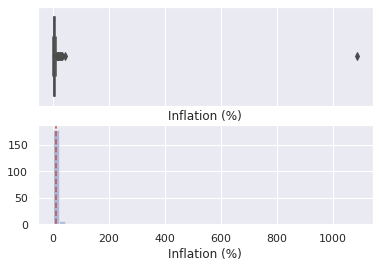

In [183]:
box_dist_plot('Inflation (%)',df_relevant)

### - Inflation % feature box plot's indicate after outlier removal

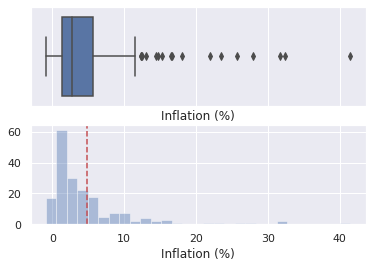

In [184]:
box_dist_plot('Inflation (%)',subset) 

In [185]:
### - Inflation % feature box plot's indicate before outlier removal

In [186]:
scaler=StandardScaler()
subset_scaled=scaler.fit_transform(subset)   
subset_scaled_df=pd.DataFrame(subset_scaled,columns=subset.columns) 

In [187]:
subset_scaled_df.head()

,World Rank,Region Rank,2019 Score,Property Rights,Judical Effectiveness,Government Integrity,Tax Burden,Gov't Spending,Fiscal Health,Business Freedom,Labor Freedom,Monetary Freedom,Trade Freedom,Investment Freedom,Financial Freedom,Tariff Rate (%),Income Tax Rate (%),Corporate Tax Rate (%),Tax Burden % of GDP,Gov't Expenditure % of GDP,Population (Millions),"GDP (Billions, PPP)",GDP Growth Rate (%),5 Year GDP Growth Rate (%),GDP per Capita (PPP),Unemployment (%),Inflation (%),FDI Inflow (Millions),Public Debt (% of GDP)
0,1.203151,1.477290,-0.980312,-1.678094,-0.849633,-0.826469,1.208145,0.702868,1.059913,-0.967898,0.048656,0.103144,-0.802353,-2.110617,-2.023490,0.284296,-0.618535,-0.444084,-1.727513,-0.656164,0.208554,-0.427088,-0.257002,-0.134546,-0.947515,0.415058,0.032802,-0.468661,-1.607111
1,-0.753192,0.517029,0.527493,0.126773,-0.794099,-0.054366,0.744534,0.423401,0.464765,0.362010,-0.514812,0.709376,1.217370,0.569223,1.106866,-1.057778,-0.391773,-1.014701,0.276125,-0.284386,-0.505957,-0.468409,0.256929,-0.311467,-0.352121,1.519024,-0.450541,-0.372662,0.553790
2,1.574856,-0.523253,-1.513070,-1.062799,-0.483112,-0.638523,-0.105420,-0.677002,-1.505270,-0.147457,-0.719709,-0.124193,-0.672646,-1.217337,-0.980038,0.693742,0.515274,-0.101713,0.235851,0.850013,0.340060,0.265654,-0.440548,-0.046086,-0.198037,0.674815,0.129471,-0.365100,-0.981498
3,1.281405,0.997160,-1.070781,-0.842318,-1.016233,-1.065211,0.538484,0.720335,-0.248139,-0.537829,-0.068428,-2.587008,-1.247062,-1.217337,-0.458312,0.830224,-0.845297,0.697151,-0.156822,-0.684763,0.048556,-0.278652,-0.917770,-0.134546,-0.676881,0.285180,4.334557,-0.676700,0.354270
4,1.124897,0.437007,-0.909948,-0.232149,-0.022183,-0.404860,-0.714983,-0.642069,-1.050157,-0.491513,-0.939242,-1.980777,-0.431761,-0.100737,0.585140,0.398031,0.515274,0.697151,0.870169,0.811882,0.397045,0.618973,-0.110164,-1.107611,0.120233,0.393412,3.367870,0.595068,-0.075205


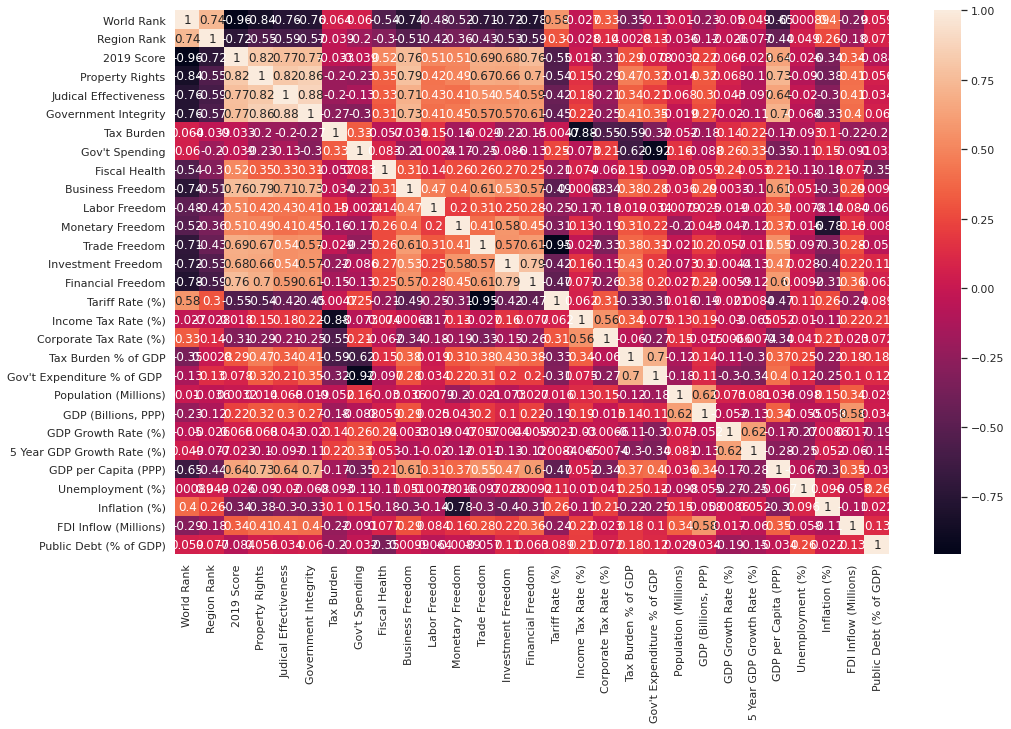

In [188]:
heat_map(subset_scaled_df.corr())

- There is a strong correlation between few features such as world rank and 2019 score.
- The dark regions show higher correlation. 
- This shows the linear correlation, lower correlation means low Linear correlation 

# K-means clustering

1 5.149020576049894
2 4.51567464261442
3 4.279248707682846
4 4.1305194860614565
5 4.02967205068916
6 3.948524209631908
7 3.8734866691940213
8 3.7901960332648517
9 3.7372467666749474
10 3.6560020003647473
11 3.5975669848895397
12 3.5528038518162903
13 3.4987937607190074
14 3.4413357453819393


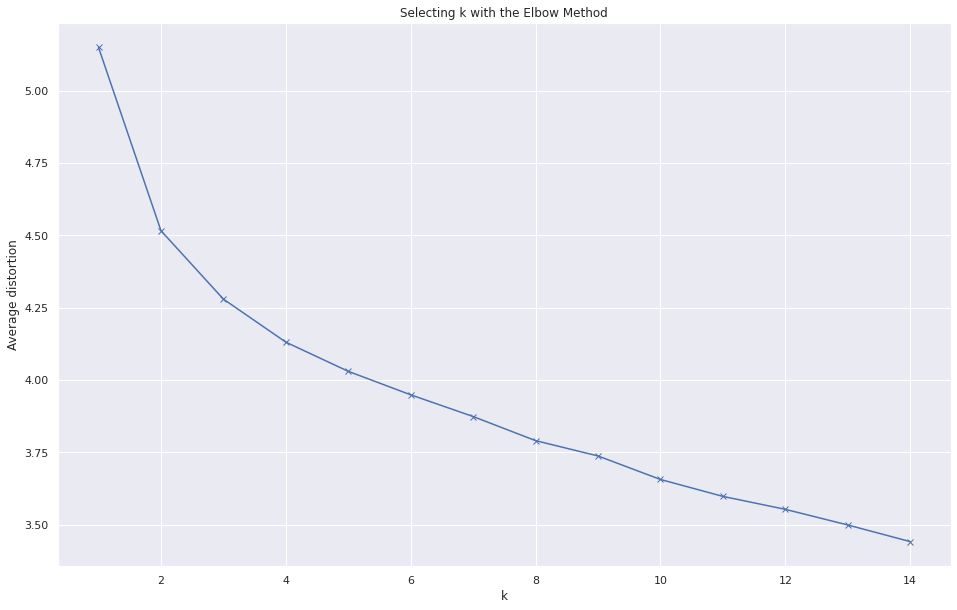

In [189]:
clusters=range(1,15)
meanDistortions=[]

for k in clusters:
    model=KMeans(n_clusters=k)
    model.fit(subset_scaled_df)
    prediction=model.predict(subset_scaled_df)
    distortion=sum(np.min(cdist(subset_scaled_df, model.cluster_centers_, 'euclidean'), axis=1)) / subset_scaled_df.shape[0]
                           
    meanDistortions.append(distortion)

    print(k,distortion)
plt.plot(clusters, meanDistortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Average distortion')
plt.title('Selecting k with the Elbow Method')
plt.show()

### Looking at the elbow plot lets pick number of clusters K=3 and apply the Kmeans for k=3  



In [190]:
kmeans = KMeans(n_clusters=3, n_init = 15, random_state=2345)
kmeans.fit(subset_scaled_df)
centroids = kmeans.cluster_centers_
centroids

array([[-0.46122648, -0.30336784,  0.34609428,  0.2300542 ,  0.08846149,
         0.02193814,  0.43994302,  0.03615038,  0.26595167,  0.30021226,
         0.27156327,  0.27960011,  0.37559073,  0.3500053 ,  0.27394357,
        -0.35212042, -0.50668489, -0.37763207,  0.01665676,  0.04680345,
        -0.1625456 , -0.08720772, -0.03363191, -0.10160213,  0.08715462,
         0.13276175, -0.28721137, -0.17909472, -0.14958541],
       [ 0.94732156,  0.58900315, -0.86651165, -0.83613835, -0.64985448,
        -0.691989  , -0.02819126,  0.25131321, -0.48418546, -0.77516094,
        -0.44333685, -0.60343727, -0.78241806, -0.76367921, -0.74249324,
         0.68050358,  0.13515626,  0.45218604, -0.43114043, -0.34779056,
         0.08756776, -0.23137107,  0.06984468,  0.23004766, -0.66078168,
        -0.05372268,  0.48608107, -0.21359392,  0.04073002],
       [-1.2915238 , -0.75779953,  1.38780898,  1.62222445,  1.50690317,
         1.80144925, -1.12264071, -0.77442449,  0.57780291,  1.26709601,
  

In [191]:
centroid_df = pd.DataFrame(centroids, columns = subset_scaled_df.columns )
centroid_df

,World Rank,Region Rank,2019 Score,Property Rights,Judical Effectiveness,Government Integrity,Tax Burden,Gov't Spending,Fiscal Health,Business Freedom,Labor Freedom,Monetary Freedom,Trade Freedom,Investment Freedom,Financial Freedom,Tariff Rate (%),Income Tax Rate (%),Corporate Tax Rate (%),Tax Burden % of GDP,Gov't Expenditure % of GDP,Population (Millions),"GDP (Billions, PPP)",GDP Growth Rate (%),5 Year GDP Growth Rate (%),GDP per Capita (PPP),Unemployment (%),Inflation (%),FDI Inflow (Millions),Public Debt (% of GDP)
0,-0.461226,-0.303368,0.346094,0.230054,0.088461,0.021938,0.439943,0.036150,0.265952,0.300212,0.271563,0.279600,0.375591,0.350005,0.273944,-0.352120,-0.506685,-0.377632,0.016657,0.046803,-0.162546,-0.087208,-0.033632,-0.101602,0.087155,0.132762,-0.287211,-0.179095,-0.149585
1,0.947322,0.589003,-0.866512,-0.836138,-0.649854,-0.691989,-0.028191,0.251313,-0.484185,-0.775161,-0.443337,-0.603437,-0.782418,-0.763679,-0.742493,0.680504,0.135156,0.452186,-0.431140,-0.347791,0.087568,-0.231371,0.069845,0.230048,-0.660782,-0.053723,0.486081,-0.213594,0.040730
2,-1.291524,-0.757800,1.387809,1.622224,1.506903,1.801449,-1.122641,-0.774424,0.577803,1.267096,0.452647,0.861369,1.081274,1.100571,1.250791,-0.871095,1.016756,-0.187503,1.114244,0.807938,0.207270,0.859874,-0.096240,-0.341971,1.539854,-0.217166,-0.524987,1.062373,0.297942


### Create labels and assign them to the rows

In [192]:
df_kmeans=subset_scaled_df[:]  
df_kmeans['Kmeans_Group']=kmeans.labels_
df_kmeans.head(10)

,World Rank,Region Rank,2019 Score,Property Rights,Judical Effectiveness,Government Integrity,Tax Burden,Gov't Spending,Fiscal Health,Business Freedom,Labor Freedom,Monetary Freedom,Trade Freedom,Investment Freedom,Financial Freedom,Tariff Rate (%),Income Tax Rate (%),Corporate Tax Rate (%),Tax Burden % of GDP,Gov't Expenditure % of GDP,Population (Millions),"GDP (Billions, PPP)",GDP Growth Rate (%),5 Year GDP Growth Rate (%),GDP per Capita (PPP),Unemployment (%),Inflation (%),FDI Inflow (Millions),Public Debt (% of GDP),Kmeans_Group
0,1.203151,1.477290,-0.980312,-1.678094,-0.849633,-0.826469,1.208145,0.702868,1.059913,-0.967898,0.048656,0.103144,-0.802353,-2.110617,-2.023490,0.284296,-0.618535,-0.444084,-1.727513,-0.656164,0.208554,-0.427088,-0.257002,-0.134546,-0.947515,0.415058,0.032802,-0.468661,-1.607111,1
1,-0.753192,0.517029,0.527493,0.126773,-0.794099,-0.054366,0.744534,0.423401,0.464765,0.362010,-0.514812,0.709376,1.217370,0.569223,1.106866,-1.057778,-0.391773,-1.014701,0.276125,-0.284386,-0.505957,-0.468409,0.256929,-0.311467,-0.352121,1.519024,-0.450541,-0.372662,0.553790,0
2,1.574856,-0.523253,-1.513070,-1.062799,-0.483112,-0.638523,-0.105420,-0.677002,-1.505270,-0.147457,-0.719709,-0.124193,-0.672646,-1.217337,-0.980038,0.693742,0.515274,-0.101713,0.235851,0.850013,0.340060,0.265654,-0.440548,-0.046086,-0.198037,0.674815,0.129471,-0.365100,-0.981498,1
3,1.281405,0.997160,-1.070781,-0.842318,-1.016233,-1.065211,0.538484,0.720335,-0.248139,-0.537829,-0.068428,-2.587008,-1.247062,-1.217337,-0.458312,0.830224,-0.845297,0.697151,-0.156822,-0.684763,0.048556,-0.278652,-0.917770,-0.134546,-0.676881,0.285180,4.334557,-0.676700,0.354270,1
4,1.124897,0.437007,-0.909948,-0.232149,-0.022183,-0.404860,-0.714983,-0.642069,-1.050157,-0.491513,-0.939242,-1.980777,-0.431761,-0.100737,0.585140,0.398031,0.515274,0.697151,0.870169,0.811882,0.397045,0.618973,-0.110164,-1.107611,0.120233,0.393412,3.367870,0.595068,-0.075205,1
5,-0.851009,0.276964,0.648118,0.249832,0.077777,-0.145799,0.607167,0.646102,-0.413635,0.957491,0.853611,0.242072,0.568835,0.792543,1.106866,-0.830308,-0.165011,-0.444084,-0.086342,-0.579902,-0.503766,-0.477878,1.578465,0.175066,-0.524321,2.449819,-0.627767,-0.451375,-0.044769,0
6,-1.672673,-1.323470,1.974987,1.372747,2.310224,1.952086,-1.273033,-0.179201,0.642992,1.619137,1.782967,1.353496,1.198841,1.015863,2.150318,-1.035031,1.271146,0.697151,0.608387,0.382908,-0.025963,1.020254,-0.330420,-0.355697,1.782866,-0.277626,-0.450541,3.705295,-0.447191,2
7,-1.164024,-0.363210,1.080355,1.634247,1.466115,1.825096,-2.329036,-1.733739,0.620713,0.732532,0.656031,0.709376,1.050604,1.462503,1.106866,-0.853055,1.649082,0.126534,2.068324,1.688897,-0.376644,0.027935,-0.110164,-0.842230,1.756621,-0.299273,-0.418318,0.394328,0.810799,2
8,-0.596685,-0.603275,0.416921,0.347254,0.455405,0.164058,0.847558,-0.205401,0.744835,0.375243,0.304778,-1.627142,-0.005581,0.122583,0.585140,-0.125150,-0.240599,-0.444084,-0.720659,0.401973,-0.354726,-0.301403,-1.138026,-0.886460,-0.070763,-0.407505,1.321717,-0.215136,-0.004189,0
9,-0.283670,-0.443231,0.165620,-0.519287,0.111097,0.113262,1.688926,0.986703,-0.009443,0.309078,0.568218,0.279962,-2.488544,-0.324057,0.585140,2.922949,-2.130279,-2.726553,-0.589768,-1.094672,-0.560751,-0.498416,-0.697514,-1.726835,0.699485,1.237621,-0.547210,-0.389911,0.080353,0


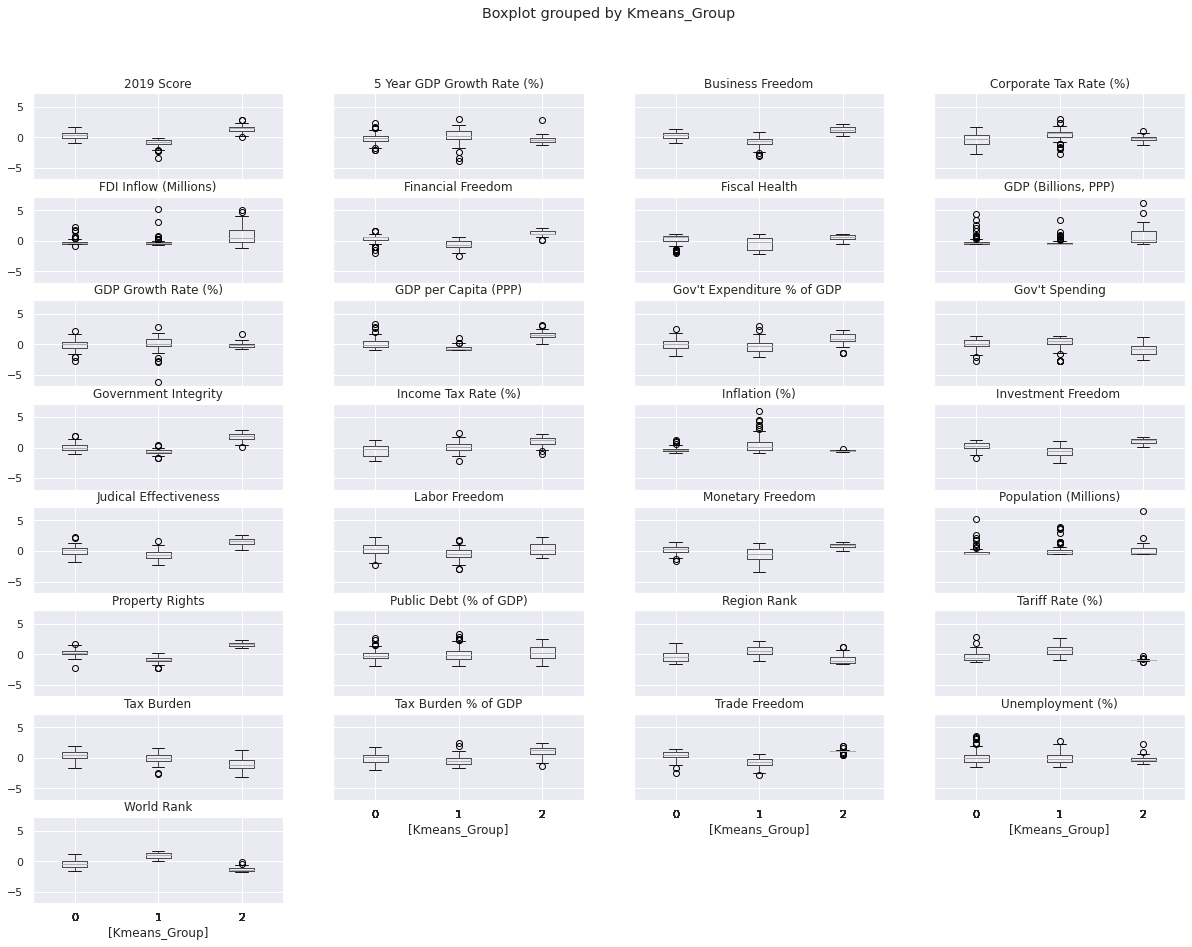

In [193]:
df_kmeans.boxplot(by = 'Kmeans_Group',  layout=(8,4), figsize=(20, 15))
plt.show()

- The above chart displays different clusters

# Hierarchical clustering

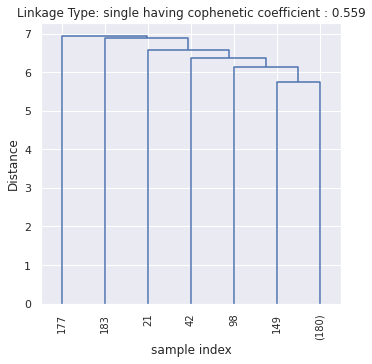

single 0.558826842554921


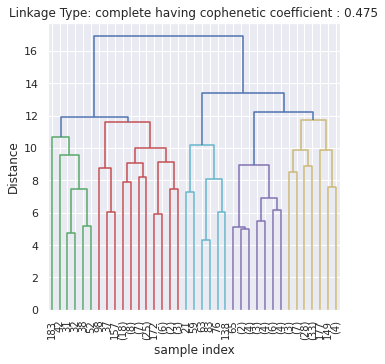

complete 0.47527923203037425


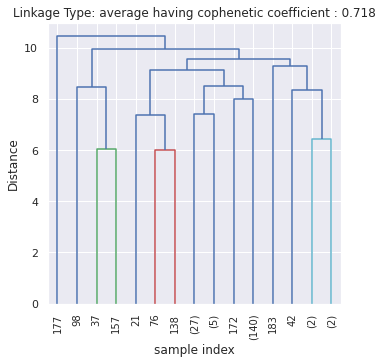

average 0.7178588111937159


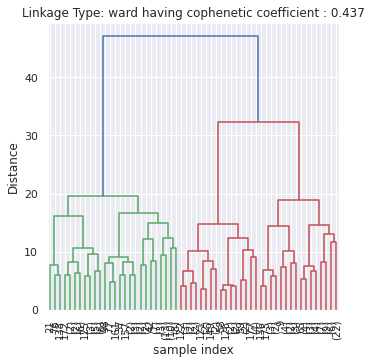

ward 0.4369438596381921


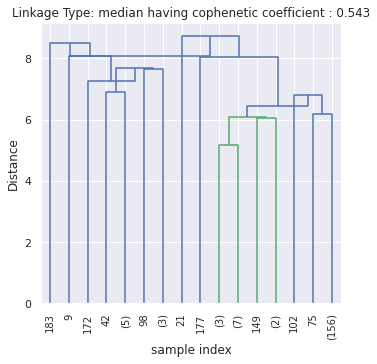

median 0.5429031139255095


In [194]:
linkage_methods=['single','complete','average','ward','median']
results_cophenetic_coef=[]
for i in linkage_methods :
    plt.figure(figsize=(5, 5))
    plt.xlabel('sample index')
    plt.ylabel('Distance')
    Z = linkage(subset_scaled_df, i)
    cc,cophn_dist=cophenet(Z,pdist(subset_scaled_df))
    dendrogram(Z,leaf_rotation=90.0,p=5,leaf_font_size=10,truncate_mode='level')
    plt.tight_layout()
    plt.title("Linkage Type: "+ i +" having cophenetic coefficient : "+str(round(cc,3)) )
    plt.show()
    results_cophenetic_coef.append((i,cc))
    print (i,cc)

In [195]:
results_cophenetic_coef_df=pd.DataFrame(results_cophenetic_coef,columns=['LinkageMethod','CopheneticCoefficient'])
results_cophenetic_coef_df

,LinkageMethod,CopheneticCoefficient
0,single,0.558827
1,complete,0.475279
2,average,0.717859
3,ward,0.436944
4,median,0.542903


Looking at the best cophenetic coefficient we get is for "Average" linkage.

But looking at dendogram 'complete' shows a good difference between clusters.

So choosing 'complete' because it has good cluster segregation.

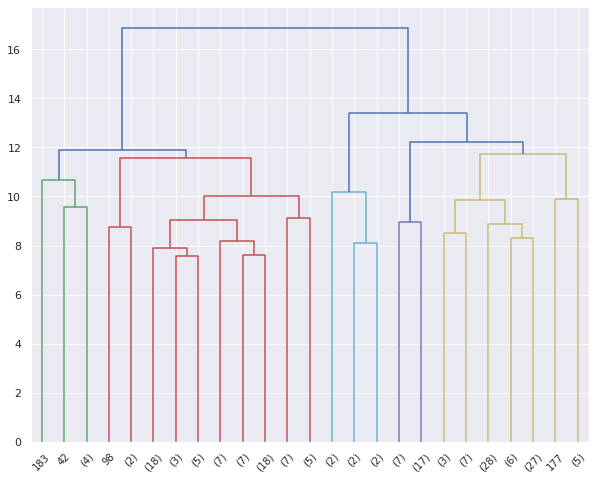

In [196]:
#use truncate_mode='lastp' to select last p formed clusters
plt.figure(figsize=(10,8))
Z = linkage(subset_scaled_df, 'complete', metric='euclidean')

dendrogram(
    Z,
    truncate_mode='lastp',  # show only the last p merged clusters
    p=25 # show only the last p merged clusters
)
plt.show()

Using the max value of 13, it results in 3 clusters

In [197]:
max_d=13
from scipy.cluster.hierarchy import fcluster
clusters = fcluster(Z, max_d, criterion='distance')

In [198]:
set(clusters) 

{1, 2, 3}

In [199]:
df_hc=subset_scaled_df[:] #Create a duplicate of the dataset
df_hc['HierarchicalClusteringLabel']=clusters
df_hc.head(3)

,World Rank,Region Rank,2019 Score,Property Rights,Judical Effectiveness,Government Integrity,Tax Burden,Gov't Spending,Fiscal Health,Business Freedom,Labor Freedom,Monetary Freedom,Trade Freedom,Investment Freedom,Financial Freedom,Tariff Rate (%),Income Tax Rate (%),Corporate Tax Rate (%),Tax Burden % of GDP,Gov't Expenditure % of GDP,Population (Millions),"GDP (Billions, PPP)",GDP Growth Rate (%),5 Year GDP Growth Rate (%),GDP per Capita (PPP),Unemployment (%),Inflation (%),FDI Inflow (Millions),Public Debt (% of GDP),HierarchicalClusteringLabel
0,1.203151,1.477290,-0.980312,-1.678094,-0.849633,-0.826469,1.208145,0.702868,1.059913,-0.967898,0.048656,0.103144,-0.802353,-2.110617,-2.023490,0.284296,-0.618535,-0.444084,-1.727513,-0.656164,0.208554,-0.427088,-0.257002,-0.134546,-0.947515,0.415058,0.032802,-0.468661,-1.607111,1
1,-0.753192,0.517029,0.527493,0.126773,-0.794099,-0.054366,0.744534,0.423401,0.464765,0.362010,-0.514812,0.709376,1.217370,0.569223,1.106866,-1.057778,-0.391773,-1.014701,0.276125,-0.284386,-0.505957,-0.468409,0.256929,-0.311467,-0.352121,1.519024,-0.450541,-0.372662,0.553790,3
2,1.574856,-0.523253,-1.513070,-1.062799,-0.483112,-0.638523,-0.105420,-0.677002,-1.505270,-0.147457,-0.719709,-0.124193,-0.672646,-1.217337,-0.980038,0.693742,0.515274,-0.101713,0.235851,0.850013,0.340060,0.265654,-0.440548,-0.046086,-0.198037,0.674815,0.129471,-0.365100,-0.981498,1


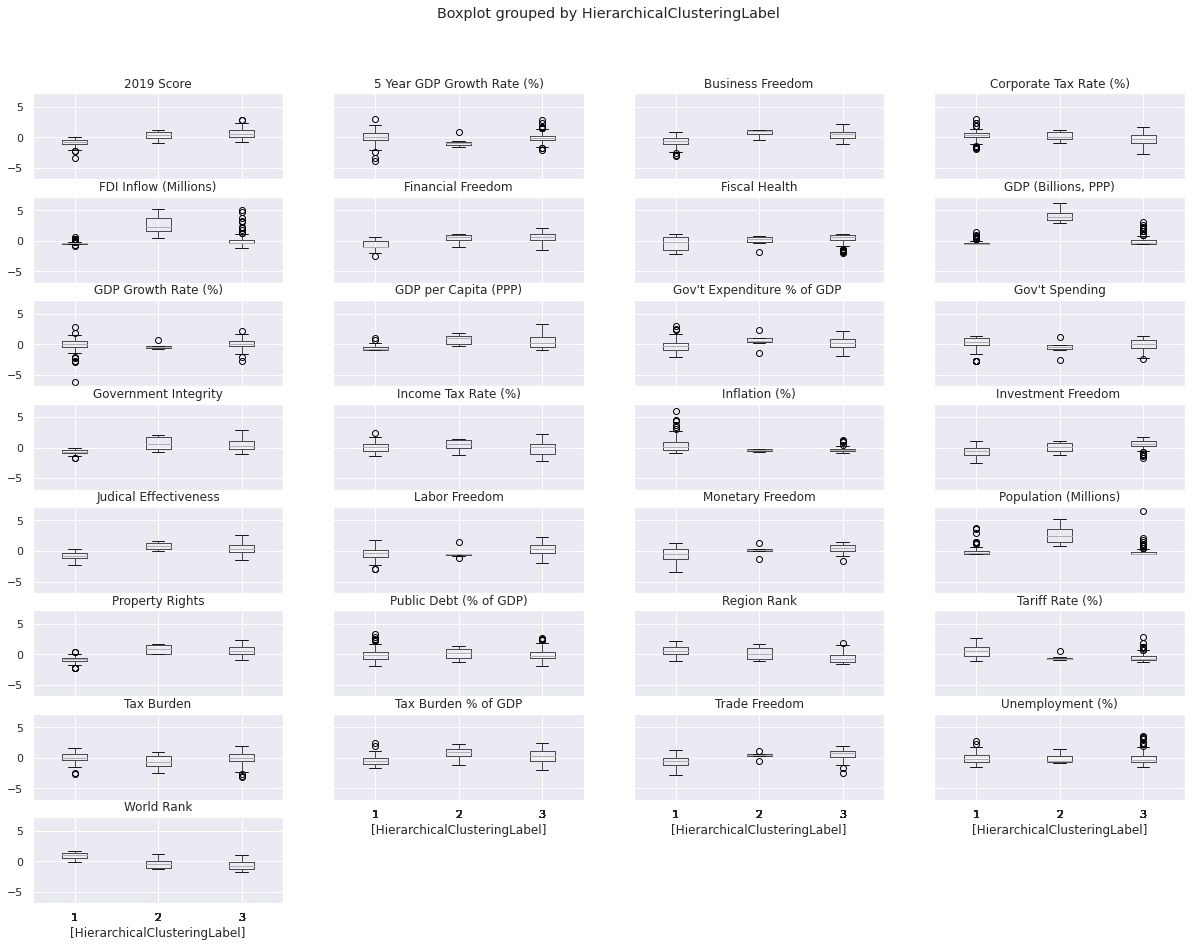

In [200]:
df_hc.boxplot(by = 'HierarchicalClusteringLabel',  layout=(8,4), figsize=(20, 15))
plt.show()

# Compare Kmeans with Hierarchical

## Silhouette Score

In [201]:
from sklearn.metrics import silhouette_score
silhouette_score(df_kmeans.drop('Kmeans_Group',axis=1),df_kmeans['Kmeans_Group'])

0.14609362272178278

In [202]:
silhouette_score(df_hc.drop('HierarchicalClusteringLabel',axis=1),df_hc['HierarchicalClusteringLabel'])

0.15694746264124987

Here Hierarchical score is slightly better than Kmeans  

In [203]:
Kmeans_results=df_kmeans.groupby('Kmeans_Group').mean()
Kmeans_results.index=['G1','G2','G3']
Kmeans_results

,World Rank,Region Rank,2019 Score,Property Rights,Judical Effectiveness,Government Integrity,Tax Burden,Gov't Spending,Fiscal Health,Business Freedom,Labor Freedom,Monetary Freedom,Trade Freedom,Investment Freedom,Financial Freedom,Tariff Rate (%),Income Tax Rate (%),Corporate Tax Rate (%),Tax Burden % of GDP,Gov't Expenditure % of GDP,Population (Millions),"GDP (Billions, PPP)",GDP Growth Rate (%),5 Year GDP Growth Rate (%),GDP per Capita (PPP),Unemployment (%),Inflation (%),FDI Inflow (Millions),Public Debt (% of GDP)
G1,-0.461226,-0.303368,0.346094,0.230054,0.088461,0.021938,0.439943,0.036150,0.265952,0.300212,0.271563,0.279600,0.375591,0.350005,0.273944,-0.352120,-0.506685,-0.377632,0.016657,0.046803,-0.162546,-0.087208,-0.033632,-0.101602,0.087155,0.132762,-0.287211,-0.179095,-0.149585
G2,0.947322,0.589003,-0.866512,-0.836138,-0.649854,-0.691989,-0.028191,0.251313,-0.484185,-0.775161,-0.443337,-0.603437,-0.782418,-0.763679,-0.742493,0.680504,0.135156,0.452186,-0.431140,-0.347791,0.087568,-0.231371,0.069845,0.230048,-0.660782,-0.053723,0.486081,-0.213594,0.040730
G3,-1.291524,-0.757800,1.387809,1.622224,1.506903,1.801449,-1.122641,-0.774424,0.577803,1.267096,0.452647,0.861369,1.081274,1.100571,1.250791,-0.871095,1.016756,-0.187503,1.114244,0.807938,0.207270,0.859874,-0.096240,-0.341971,1.539854,-0.217166,-0.524987,1.062373,0.297942


In [204]:
Hierarchical_results=df_hc.groupby('HierarchicalClusteringLabel').mean()
Hierarchical_results.index=['G3','G1','G2']
Hierarchical_results

,World Rank,Region Rank,2019 Score,Property Rights,Judical Effectiveness,Government Integrity,Tax Burden,Gov't Spending,Fiscal Health,Business Freedom,Labor Freedom,Monetary Freedom,Trade Freedom,Investment Freedom,Financial Freedom,Tariff Rate (%),Income Tax Rate (%),Corporate Tax Rate (%),Tax Burden % of GDP,Gov't Expenditure % of GDP,Population (Millions),"GDP (Billions, PPP)",GDP Growth Rate (%),5 Year GDP Growth Rate (%),GDP per Capita (PPP),Unemployment (%),Inflation (%),FDI Inflow (Millions),Public Debt (% of GDP)
G3,0.921958,0.627129,-0.846616,-0.829531,-0.726405,-0.706615,0.041702,0.138355,-0.459685,-0.713949,-0.390701,-0.590656,-0.712937,-0.742705,-0.726490,0.606058,0.030510,0.366588,-0.382223,-0.227044,-0.016336,-0.291657,-0.088100,0.086583,-0.631051,-0.059880,0.501961,-0.354273,0.000694
G1,-0.371705,0.170268,0.309699,0.807017,0.841363,0.699112,-0.640576,-0.546730,-0.015809,0.745765,-0.337966,0.117879,0.395893,0.048143,0.411232,-0.523223,0.437167,0.158869,0.762771,0.559264,2.673912,4.186414,-0.342657,-0.753769,0.755907,-0.093632,-0.388781,2.620858,0.102869
G2,-0.699054,-0.500642,0.643807,0.600900,0.518196,0.511168,0.005436,-0.075739,0.360494,0.514132,0.325675,0.454996,0.534125,0.578068,0.543815,-0.442962,-0.049834,-0.296175,0.253653,0.144365,-0.146068,-0.020570,0.089266,-0.022945,0.448689,0.052399,-0.369527,0.121410,-0.006654


<Figure size 1440x1440 with 0 Axes>

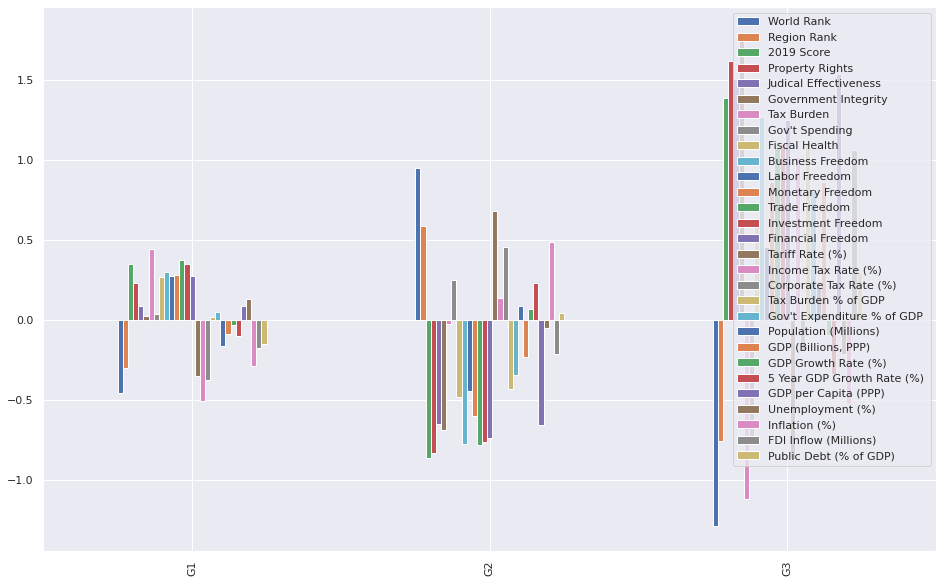

In [205]:
plt.figure(figsize=(20,20))
Kmeans_results.plot.bar()
plt.show()

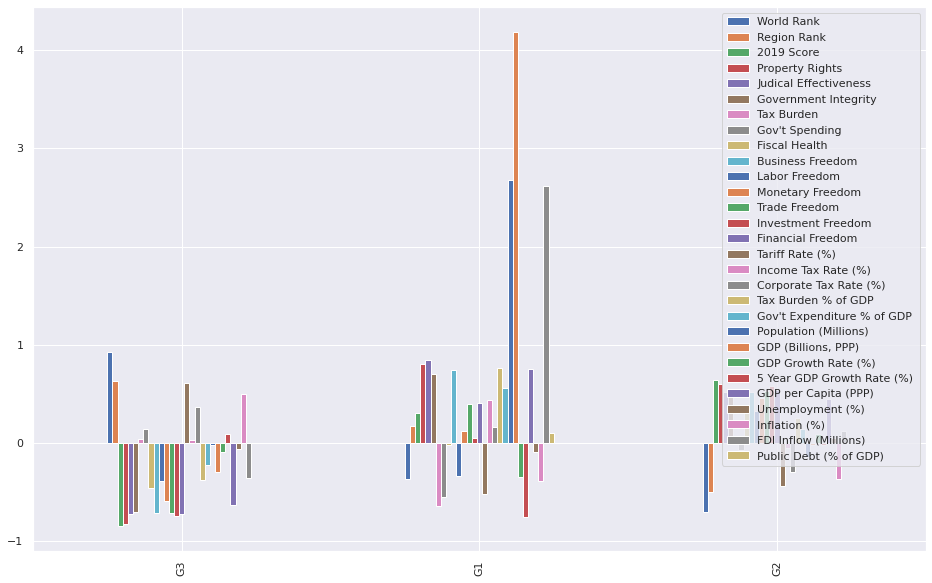

In [206]:
Hierarchical_results.plot.bar()

# Hierarichal Clustering results to original dataset

In [207]:
relevant_cols=subset.columns
subset['hc_label']=df_hc['HierarchicalClusteringLabel'] 
for col in relevant_cols:
    print (col)
    print ( subset.groupby('hc_label').describe().round()[col][['count','mean','min','max']])
    
    print ("\n\n")

World Rank
          count   mean   min    max
hc_label                           
1          79.0  138.0  85.0  180.0
2           6.0   72.0  24.0  150.0
3         101.0   55.0   1.0  141.0



Region Rank
          count  mean  min   max
hc_label                        
1          79.0  28.0  8.0  47.0
2           6.0  23.0  8.0  41.0
3         101.0  14.0  1.0  43.0



2019 Score
          count  mean   min   max
hc_label                         
1          79.0  53.0  28.0  62.0
2           6.0  64.0  52.0  74.0
3         101.0  68.0  53.0  90.0



Property Rights
          count  mean   min   max
hc_label                         
1          79.0  36.0   8.0  59.0
2           6.0  68.0  52.0  84.0
3         101.0  64.0  33.0  97.0



Judical Effectiveness
          count  mean   min   max
hc_label                         
1          79.0  32.0   5.0  52.0
2           6.0  60.0  45.0  75.0
3         101.0  54.0  18.0  92.0



Government Integrity
          count  mean   min   max
hc_

- Based on features such as GDP per Capita (PPP), Inflation (%), GDP (Billions, PPP) Group2 comprise of countries that are better from Group 1 and Group 3
- Group 1 looks like it is lowest on the list